# Predicting Diabetes Utilizing Neural Networks with Keras

### Name: Joseph Willemsz

### Date: May 16, 2022

### **Predicting Diabetes**

In this lab we'll be using a dataset from kaggle publicly available data from the Centers for Disease Control and Prevention (CDC), and in particular the Behavioral Risk Factor Surveillance System (BRFSS).

Dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?select=diabetes_binary_health_indicators_BRFSS2015.csv

#### <u>Goal:</u> 
Predict diabetes (binary classification)

# Table of Contents:
- [Data Preparation & Preprocessing](#import)
- [Machine Learning Models](#models)
- [Conclusion](#end)

---

# Data Preparation & Pre-Processing <a class="anchor" id="import"></a>

First we import the data as `diabetes_data`.

In [1]:
import pandas as pd 
import numpy as np

diabetes_data = pd.read_csv("Data/diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
diabetes_data.columns = map(str.lower, diabetes_data.columns)
diabetes_data

,diabetes_binary,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


We can see that our data is balanced since the target variable `diabetes_binary` has equal counts for the two classes.

In [2]:
diabetes_data["diabetes_binary"].value_counts()

0.0    35346
1.0    35346
Name: diabetes_binary, dtype: int64

Then we create a separate dataset `y` that contains only the target variable `diabetes_binary`.

In [3]:
y = diabetes_data["diabetes_binary"]

And a dataset `X` that contains all the predictor variables.

In [4]:
X = diabetes_data.drop('diabetes_binary', axis=1)

In order to run a neural network model later we must scale our predictor dataset `X` and it is not called `X_scaled`.

In [5]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
X_scaled = pd.DataFrame(min_max_scaler.fit_transform(X.values), columns=X.columns)
X_scaled

,highbp,highchol,cholcheck,bmi,smoker,stroke,heartdiseaseorattack,physactivity,fruits,veggies,...,anyhealthcare,nodocbccost,genhlth,menthlth,physhlth,diffwalk,sex,age,education,income
0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,1.0,0.197674,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,0.0,0.0,0.583333,0.8,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
70688,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
70689,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
70690,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


Here we split our balanced data into training and testing datasets in order to determine the training and testing accuracies of our models.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=0)

In [7]:
# remove warnings
import warnings
warnings.filterwarnings('ignore')

---

# Machine Learning Models <a class="anchor" id="models"></a>

In this section we will be constructing a several machine learning models that predict diabetes. The models used include Neural Networks and Naive Bayes.

In [8]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import sklearn
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn import preprocessing
import pydot
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.neural_network import MLPClassifier

## <u>Neural Networks</u>

We will first perform a grid search to determine the optimal number of hidden layer nodes and learning rate. Note that we a are creating neural network models with a single layer.

In [9]:
%%time
params = dict()
params['hidden_layer_sizes'] = np.arange(5, 105, 5)
params['learning_rate_init'] = [0.001, 0.01, 0.1, 1]

np.random.seed(0)
grid_nn = GridSearchCV(estimator = MLPClassifier(random_state=0),
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = [(slice(None), slice(None))],
                  verbose = 5)

np.random.seed(0)
grid_nn.fit(X_train, y_train)

Fitting 1 folds for each of 80 candidates, totalling 80 fits
[CV 1/1] END hidden_layer_sizes=5, learning_rate_init=0.001;, score=0.751 total time=  24.9s
[CV 1/1] END hidden_layer_sizes=5, learning_rate_init=0.01;, score=0.751 total time=  10.6s
[CV 1/1] END hidden_layer_sizes=5, learning_rate_init=0.1;, score=0.731 total time=   3.4s
[CV 1/1] END hidden_layer_sizes=5, learning_rate_init=1;, score=0.498 total time=   1.0s
[CV 1/1] END hidden_layer_sizes=10, learning_rate_init=0.001;, score=0.751 total time=   7.9s
[CV 1/1] END hidden_layer_sizes=10, learning_rate_init=0.01;, score=0.753 total time=   4.0s
[CV 1/1] END hidden_layer_sizes=10, learning_rate_init=0.1;, score=0.743 total time=   1.5s
[CV 1/1] END hidden_layer_sizes=10, learning_rate_init=1;, score=0.502 total time=   1.5s
[CV 1/1] END hidden_layer_sizes=15, learning_rate_init=0.001;, score=0.755 total time=  11.0s
[CV 1/1] END hidden_layer_sizes=15, learning_rate_init=0.01;, score=0.749 total time=   4.1s
[CV 1/1] END hidde

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=MLPClassifier(random_state=0),
             param_grid={'hidden_layer_sizes': array([  5,  10,  15,  20,  25,  30,  35,  40,  45,  50,  55,  60,  65,
        70,  75,  80,  85,  90,  95, 100]),
                         'learning_rate_init': [0.001, 0.01, 0.1, 1]},
             scoring='accuracy', verbose=5)

We can see that our optimal neural network has 100 nodes in the hidden layer and a learning rate of 0.001.

In [10]:
grid_nn.best_params_

{'hidden_layer_sizes': 100, 'learning_rate_init': 0.001}

Next we will determine the optimal neural network using Keras and test which activation and optimizer functions yield the highest test accuracy. 

In [11]:
tf.random.set_seed(1)
inputs = keras.Input(shape=(21,), dtype="float32")
x = layers.Dense(100, activation = 'relu')(inputs)
outputs = layers.Dense(3)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='diabetes_model')

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              metrics=['accuracy']
             )

model.fit(X_train, y_train, epochs=50, verbose=0)
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)

scores = model.evaluate(X_test, y_test, verbose=0)
print("test loss, test acc:", scores)

test loss, test acc: [1.0986087322235107, 0.3664332628250122]


Using the optimal hyperparamaters from the grid search we see that the test accuracy = 36.6% with 50 epochs, relu activation function, and "sparse_categorical_entropy" loss function.

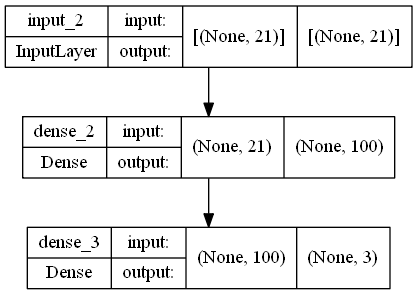

In [12]:
tf.random.set_seed(1)
inputs = keras.Input(shape=(21,), dtype="float32")
x = layers.Dense(100, activation = 'softmax')(inputs)
outputs = layers.Dense(3)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name='diabetes_model')

model.compile(loss='sparse_categorical_crossentropy', 
              optimizer=keras.optimizers.Adam(learning_rate=1e-3), 
              metrics=['accuracy']
             )

keras.utils.plot_model(model, show_shapes = True)

In [13]:
model.fit(X_train, y_train, epochs=50, verbose=0)
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)

scores = model.evaluate(X_test, y_test, verbose=0)
print("test loss, test acc:", scores)

test loss, test acc: [0.5056045055389404, 0.7570549249649048]


Our optimal neural network model has a test accuracy of 75.7% and includes the following hyperparameters:
- number of hidden layers = 1
- number of nodes = 100
- learning rate = 0.001
- activation function = softmax
- optimizer function = Adam
- loss function = SparseCategoricalEntropy
- number of epochs = 50

In the table below we see additional metrics for our Neural Network model including precision, recall, and f1-score.

In [14]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

         0.0       0.79      0.69      0.74      6932
         1.0       0.73      0.82      0.78      7207

    accuracy                           0.76     14139
   macro avg       0.76      0.76      0.76     14139
weighted avg       0.76      0.76      0.76     14139



Here we create a dictionary `top_models` that contains the accuracies of our optimal models.

In [15]:
top_models = dict()
top_models['neural_network'] = scores[1]*100

## <u>Naive Bayes</u>

Now we determine the optimal Naive Bayes model. We first perform a grid search to find the optimal `var_smoothing` hyperparameter.

In [16]:
# define search space
params = dict()
params['var_smoothing'] = [1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 1e-04, 1e-03, 1e-02, 1e-01]

In [17]:
nb_model = GaussianNB()
np.random.seed(0)
grid_nb = GridSearchCV(estimator = nb_model,
                  param_grid = params,
                  scoring = 'accuracy',
                  cv = [(slice(None), slice(None))],
                  verbose = 1)

In [18]:
%%time
np.random.seed(0)
grid_nb.fit(X_train, y_train)

Fitting 1 folds for each of 10 candidates, totalling 10 fits
Wall time: 478 ms


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-10, 1e-09, 1e-08, 1e-07, 1e-06,
                                           1e-05, 0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=1)

Our optimal Naive Bayes model has a test accuracy of 72.247% where `var_smoothing` = 1e-05.

In [19]:
print('Best hyperparameters:', grid_nb.best_params_)
print('Training accuracy:', round(grid_nb.best_score_, 4)*100, '%')

nb = grid_nb.best_estimator_
np.random.seed(0)
nb.fit(X_train, y_train)
nb_preds = nb.predict(X_test)
nb_accuracy = nb.score(X_test, y_test)*100
print('Testing accuracy:', round(nb_accuracy, 4), '%')

Best hyperparameters: {'var_smoothing': 1e-05}
Training accuracy: 71.8 %
Testing accuracy: 72.247 %


In the table below we see additional metrics for our Naive Bayes model including precision, recall, and f1-score.

In [20]:
print(classification_report(y_test, nb_preds))

              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      6932
         1.0       0.73      0.71      0.72      7207

    accuracy                           0.72     14139
   macro avg       0.72      0.72      0.72     14139
weighted avg       0.72      0.72      0.72     14139



We add our optimal Naive Bayes model to the `top_models` dictionary.

In [21]:
top_models['naive_bayes'] = nb_accuracy

---

# Conclusion <a class="anchor" id="end"></a>

In [22]:
top_models = dict(sorted(top_models.items(),key= lambda x:x[1]))

[Text(0.5, 1.0, 'Model Accuracy'), Text(0, 0.5, 'Test accuracy (in %)')]

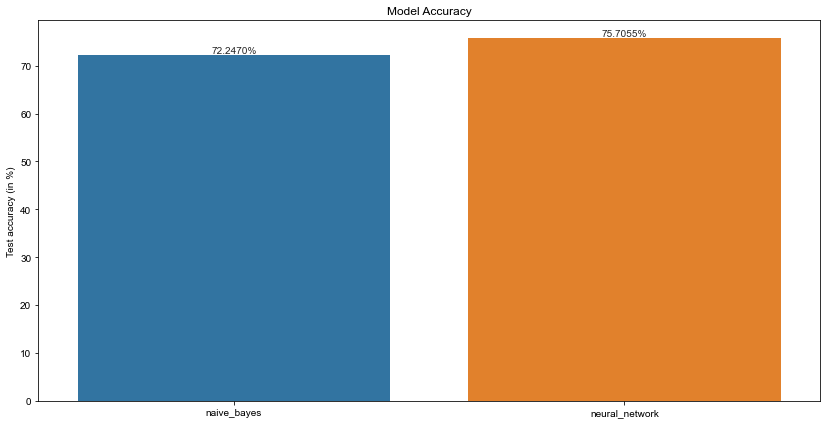

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))

keys = list(top_models.keys())
# get values in the same order as keys, and parse percentage values
vals = list(top_models.values())
ax = sns.barplot(x=keys, y=vals)

# set background theme
sns.set_style("whitegrid")

ax.bar_label(ax.containers[0], label_type='edge', fmt='%.4f%%')
ax.set(title='Model Accuracy', ylabel="Test accuracy (in %)")

[Text(0.5, 1.0, 'Neural Network Confusion Matrix'),
 Text(0.5, 16.0, 'Predicted Label'),
 Text(34.0, 0.5, 'True Label')]

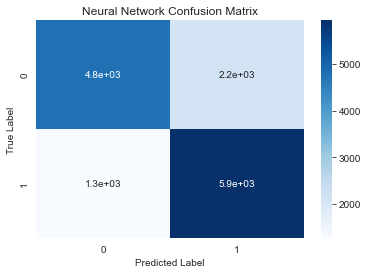

In [24]:
cf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=preds)

import seaborn as sns
ax = sns.heatmap(cf_matrix, 
                 annot=True,
                 cmap='Blues')

ax.set(title="Neural Network Confusion Matrix", 
       xlabel='Predicted Label', 
       ylabel='True Label')

[Text(0.5, 1.0, 'Naive Bayes Confusion Matrix'),
 Text(0.5, 16.0, 'Predicted Label'),
 Text(34.0, 0.5, 'True Label')]

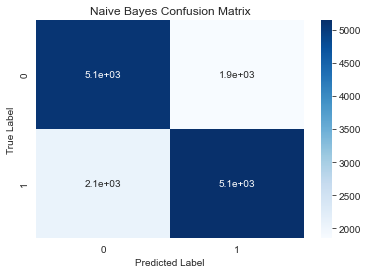

In [25]:
cf_matrix = tf.math.confusion_matrix(labels=y_test, predictions=nb_preds)

import seaborn as sns
ax = sns.heatmap(cf_matrix, 
                 annot=True,
                 cmap='Blues')

ax.set(title="Naive Bayes Confusion Matrix", 
       xlabel='Predicted Label', 
       ylabel='True Label')

In conclusion, from the barchart above we can see that the optimal Neural Network model performed better in predicting whether a person had diabetes or not, compared to the optimal Naive Bayes model with a test accuracy of 75.7%. In addition, the neural network model had a higher sensitivity rate, meaning this model could correctly predict the people that were prone diabetes. On the other hand, the Naive Bayes model had a higher specificity rate, meaning this model could correctly predict people those that were not prone to diabetes.

As specified earlier, the optimal neural network model has a test accuracy of 75.7% and includes the following hyperparameters:
- number of hidden layers = 1
- number of nodes = 100
- learning rate = 0.001
- activation function = softmax
- optimizer function = Adam
- loss function = SparseCategoricalEntropy
- number of epochs = 50